1. Importing packages and libraries.

In [3]:
import numpy as np
import scipy
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, argrelextrema, peak_widths
from scipy.optimize import curve_fit
from pybaselines import Baseline
from sklearn.metrics import auc
import cv2
from scipy.stats import norm
from lmfit import Parameters, Minimizer
from lmfit.models import LorentzianModel,ConstantModel, GaussianModel

2. Dataset

In [5]:
# Uploading the data of all lanes.

grey_values_list = ["Grey_Values_T0", "Grey_Values_T10s", "Grey_Values_T30s", "Grey_Values_T1M", "Grey_Values_T3M", "Grey_Values_T6M",
                   "Grey_Values_T30M", "Grey_Values_T100M", "Grey_Values_L1", "Grey_Values_L2"]

cy5_excel = "data/1 T19G + U19U CY5.xlsx"
# Uploading the data of all lanes.

#CY5
data_cy5 = pd.read_excel(cy5_excel)

for d in data_cy5:
    for l in grey_values_list:
        if d == l:
            data_cy5 = data_cy5.rename(columns={d: d+'_CY5'})

In [6]:
data_cy5

,Distance,Grey_Values_T0_CY5,Grey_Values_T10s_CY5,Grey_Values_T30s_CY5,Grey_Values_T1M_CY5,Grey_Values_T3M_CY5,Grey_Values_T6M_CY5,Grey_Values_T30M_CY5,Grey_Values_T100M_CY5,Grey_Values_L1_CY5,Grey_Values_L2_CY5
0,0.00,1393.611,1263.722,1244.389,1263.222,1215.889,1191.111,1241.556,1322.333,1372.944,1378.778
1,0.01,1381.333,1258.778,1243.556,1272.500,1211.333,1194.000,1246.111,1320.389,1369.444,1384.944
2,0.02,1399.222,1285.111,1239.333,1266.500,1222.944,1195.000,1260.778,1351.278,1382.444,1396.278
3,0.03,1334.278,1302.056,1239.778,1264.222,1225.278,1195.556,1263.222,1351.889,1392.611,1396.389
4,0.04,1319.000,1290.111,1242.111,1264.389,1236.056,1191.333,1245.000,1327.000,1397.167,1411.278
...,...,...,...,...,...,...,...,...,...,...,...
912,9.12,1515.389,1588.556,1627.833,1589.222,1650.167,1459.444,1795.111,1550.111,2807.111,3747.722
913,9.13,1512.944,1578.500,1607.500,1585.444,1627.667,1445.333,1794.889,1556.778,2833.611,3779.278
914,9.14,1509.833,1564.944,1575.556,1569.333,1604.722,1442.333,1797.111,1564.944,2837.778,3822.167
915,9.15,1510.389,1567.056,1584.389,1553.944,1587.611,1443.333,1796.333,1584.667,2839.167,3865.333


In [4]:
x_data = data_cy5["Distance"]

y_list = y5.tolist()+y_fill1.tolist()+y4.tolist()+y_fill4.tolist()+y3.tolist()+y_fill2.tolist()+y2.tolist()+y_fill3.tolist()+y1.tolist()
y_data = pd.DataFrame(y_list, columns=["Intensity Values"])

xy_data = pd.concat([x_data, y_data], axis=1)
xy_data

,Size in nt,Intensity Values
0,20.0,1.003727
1,20.1,1.224423
2,20.2,1.489916
3,20.3,1.808449
4,20.4,2.189602
...,...,...
1295,149.5,0.000396
1296,149.6,0.000271
1297,149.7,0.000185
1298,149.8,0.000125


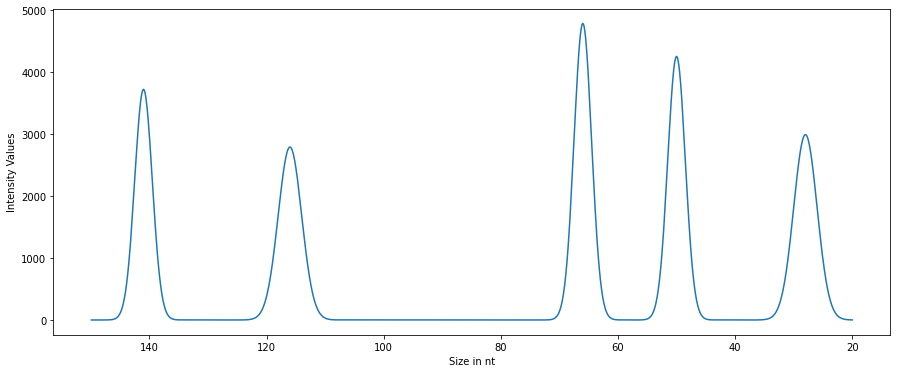

In [5]:
plt.figure(figsize=(15,6))
plot = plt.plot(xy_data["Size in nt"], xy_data["Intensity Values"])
ax = plt.gca().invert_xaxis()
plt.xlabel("Size in nt")
plt.ylabel("Intensity Values")
plt.show()

3. Finding the peak values and locations.

In [6]:
peaks_list = []
peaks, values = find_peaks(xy_data["Intensity Values"], height=1000)
peak_values = xy_data.iloc[peaks, 0]
peak_values = list(peak_values)
peak_data = (peak_values)
peaks_list.append(peak_data)

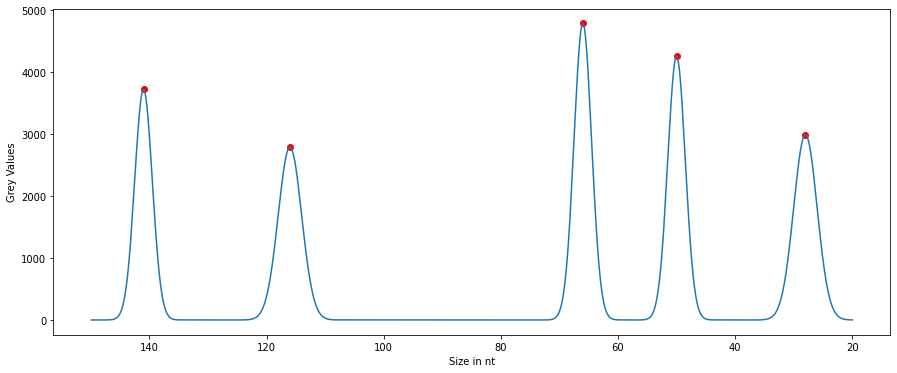

In [7]:
plt.figure(figsize=(15,6))
plot = plt.plot(xy_data["Size in nt"], xy_data["Intensity Values"])
plt.scatter(peak_values, values.values(), color='red')
ax = plt.gca().invert_xaxis()
plt.xlabel("Size in nt")
plt.ylabel("Grey Values")
plt.show()

In [8]:
widths, width_heights, left_ips, right_ips = peak_widths(xy_data["Intensity Values"], peaks, rel_height=1)

In [9]:
from scipy.interpolate import interp1d

def index_to_xdata(xdata, indices):
    "interpolate the values from signal.peak_widths to xdata"
    ind = np.arange(len(xdata))
    f = interp1d(ind,xdata)
    return f(indices)

widths1 = index_to_xdata(xy_data["Size in nt"], widths)
left_ips1 = index_to_xdata(xy_data["Size in nt"], left_ips)
right_ips1 = index_to_xdata(xy_data["Size in nt"], right_ips)

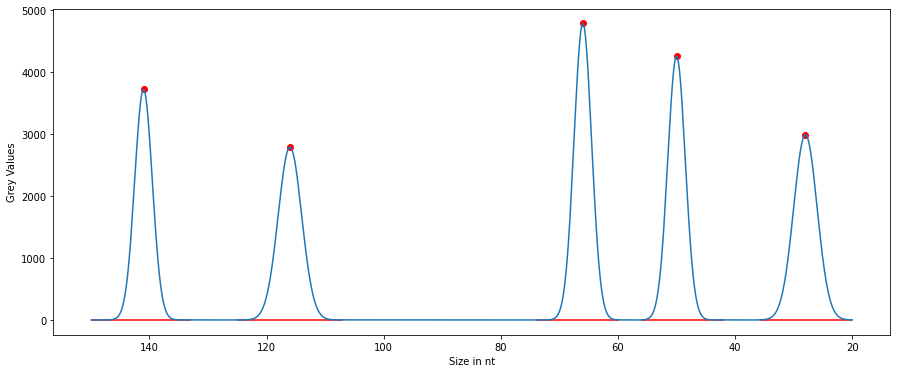

In [10]:
plt.figure(figsize=(15,6))
plot = plt.plot(xy_data["Size in nt"], xy_data["Intensity Values"])
plt.scatter(peak_values, values.values(), color='red')
plt.hlines(width_heights, left_ips1, right_ips1, color='r')
ax = plt.gca().invert_xaxis()
plt.xlabel("Size in nt")
plt.ylabel("Grey Values")
plt.show()

4. Gaussian fitting. INDEPENDENT

In [11]:
left_ips = list(left_ips)
right_ips = list(right_ips)
for i, n in enumerate(left_ips):
    left_ips[i] = int(n)
    
for i, n in enumerate(right_ips):
    right_ips[i] = int(n)


In [12]:
values_list = list(values.values())
values_list_each=[]

for i in values_list:
    for j in i:
        values_list_each.append(j)

In [13]:
# Initiating the model for all possible positions with sd with Gaussian

model=ConstantModel()
params=model.make_params()

In [34]:
model

<lmfit.Model: Model(constant)>

In [14]:
# Fitting the data based on the Gaussian model

f1 = GaussianModel(prefix='f1_')
f2 = GaussianModel(prefix='f2_') 
f3 = GaussianModel(prefix='f3_') 


# Making guesses
p1=f1.make_params()
p1['f1_center'].set(peak_data[1],min=left_ips1[1], max=right_ips1[1]) #first parameter is the mean, or the peak location on x axis, then where the peak begins and ends
p1['f1_amplitude'].set(values_list_each[1],min=0) #the height of the peak, the point on the y axis where the mean is located. 
#p1['f1_sigma'].set(sd)

p2=f2.make_params()
p2['f2_center'].set(peak_data[2],min=left_ips1[2], max=right_ips1[2])
p2['f2_amplitude'].set(values_list_each[2],min=0)
#p2['f2_sigma'].set(sd)

p3=f3.make_params()
p3['f3_center'].set(peak_data[3],min=left_ips1[3], max=right_ips1[3])
p3['f3_amplitude'].set(values_list_each[3],min=0)
#p3['f3_sigma'].set(sd)

In [15]:
# Making a compound model of all possible variations

model1 = model+f1
model2 = model+f2
model3 = model+f3
params.update(p1)
params.update(p2)
params.update(p3)

name,value,initial value,min,max,vary,expression
c,0.00000000,None,-inf,inf,True,
f1_amplitude,4255.38432,4255.384324281949,0.00000000,inf,True,
f1_center,50.0000000,50.000000000000426,41.9000000,56.0000000,True,
f1_sigma,1.00000000,None,0.00000000,inf,True,
f1_fwhm,2.35482000,None,-inf,inf,False,2.3548200*f1_sigma
f1_height,1697.65281,None,-inf,inf,False,"0.3989423*f1_amplitude/max(1e-15, f1_sigma)"
f2_amplitude,4787.30736,4787.307364817193,0.00000000,inf,True,
f2_center,66.0000000,66.00000000000065,59.9000000,74.0000000,True,
f2_sigma,1.00000000,None,0.00000000,inf,True,
f2_fwhm,2.35482000,None,-inf,inf,False,2.3548200*f2_sigma


In [16]:
model1_y = xy_data["Intensity Values"]
model1_y = model1_y[left_ips[1]:right_ips[1]]

model1_x = xy_data["Size in nt"]
model1_x = model1_x[left_ips[1]:right_ips[1]]

model2_y = xy_data["Intensity Values"]
model2_y = model2_y[left_ips[2]:right_ips[2]]

model2_x = xy_data["Size in nt"]
model2_x = model2_x[left_ips[2]:right_ips[2]]

model3_y = xy_data["Intensity Values"]
model3_y = model3_y[left_ips[3]:right_ips[3]]

model3_x = xy_data["Size in nt"]
model3_x = model3_x[left_ips[3]:right_ips[3]]

model_all_x = xy_data["Size in nt"]
model_all_x = model_all_x[left_ips[1]:right_ips[3]]

model_all_y = xy_data["Size in nt"]
model_all_y = model_all_y[left_ips[1]:right_ips[3]]

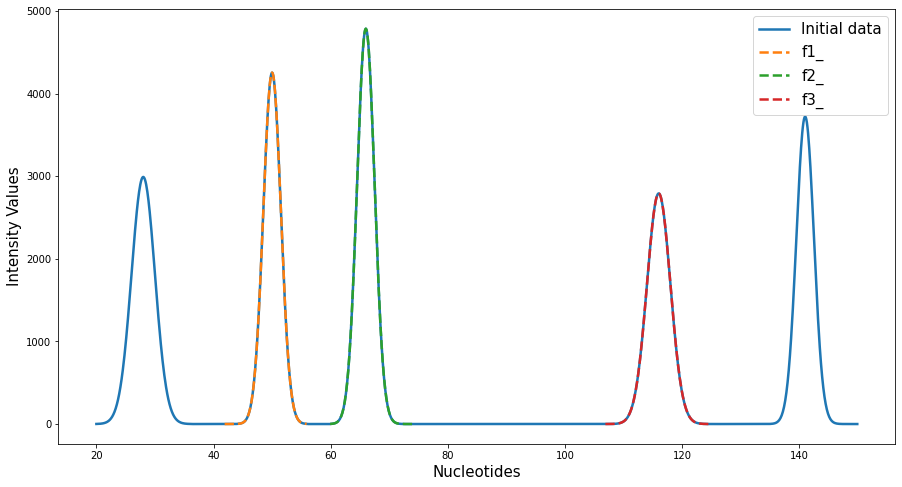

In [17]:
xy_data["Size in nt"], xy_data["Intensity Values"]
result1 = model1.fit(data=model1_y, params = params, x = model1_x ) #xy_data["Intensity Values"], xy_data["Size in nt"]
comps1 = result1.eval_components()

result2 = model2.fit(data=model2_y, params = params, x = model2_x ) #xy_data["Intensity Values"], xy_data["Size in nt"]
comps2 = result2.eval_components()

result3 = model3.fit(data=model3_y, params = params, x = model3_x ) #xy_data["Intensity Values"], xy_data["Size in nt"]
comps3 = result3.eval_components()

plt.figure(figsize=(15, 8))
plt.plot(xy_data["Size in nt"], xy_data["Intensity Values"],  label='Initial data', linewidth = 2.5)

# Plotting each peak (component)
for name, comp in comps1.items():
    if name == "constant":
        continue
    else:
        #continue
        plt.plot(model1_x,comp, '--', label=name, linewidth = 2.5) #xy_data["Size in nt"]
        
# Plotting each peak (component)
for name, comp in comps2.items():
    if name == "constant":
        continue
    else:
        #continue
        plt.plot(model2_x,comp, '--', label=name, linewidth = 2.5) #xy_data["Size in nt"]
        
# Plotting each peak (component)
for name, comp in comps3.items():
    if name == "constant":
        continue
    else:
        #continue
        plt.plot(model3_x,comp, '--', label=name, linewidth = 2.5) #xy_data["Size in nt"]                 
        
#ax = plt.gca().invert_xaxis()
plt.xlabel("Nucleotides", fontsize = 15)
plt.ylabel("Intensity Values", fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [18]:
model_all = model+f1+f2+f3

In [19]:
model_all1 = f1+f2+f3
params.update(p1)
params.update(p2)
params.update(p3)

name,value,initial value,min,max,vary,expression
c,0.00000000,None,-inf,inf,True,
f1_amplitude,4255.38432,4255.384324281949,0.00000000,inf,True,
f1_center,50.0000000,50.000000000000426,41.9000000,56.0000000,True,
f1_sigma,1.00000000,None,0.00000000,inf,True,
f1_fwhm,2.35482000,None,-inf,inf,False,2.3548200*f1_sigma
f1_height,1697.65281,None,-inf,inf,False,"0.3989423*f1_amplitude/max(1e-15, f1_sigma)"
f2_amplitude,4787.30736,4787.307364817193,0.00000000,inf,True,
f2_center,66.0000000,66.00000000000065,59.9000000,74.0000000,True,
f2_sigma,1.00000000,None,0.00000000,inf,True,
f2_fwhm,2.35482000,None,-inf,inf,False,2.3548200*f2_sigma


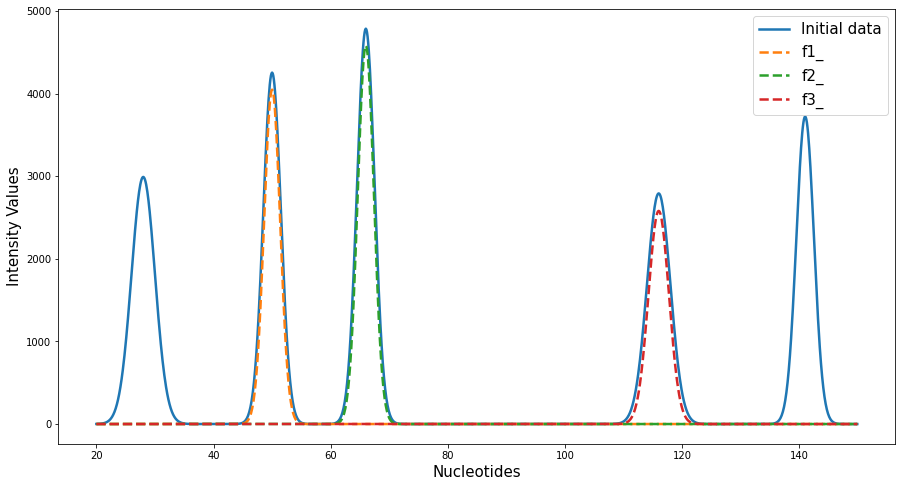

In [20]:
# Dependent
xy_data["Size in nt"], xy_data["Intensity Values"]
result = model_all.fit(data=xy_data["Intensity Values"], params = params, x = xy_data["Size in nt"] ) #xy_data["Intensity Values"], xy_data["Size in nt"]
comps = result.eval_components()

plt.figure(figsize=(15, 8))
plt.plot(xy_data["Size in nt"], xy_data["Intensity Values"],  label='Initial data', linewidth = 2.5)

# Plotting each peak (component)
for name, comp in comps.items():
    if name == "constant":
        continue
    else:
        #continue
        plt.plot(xy_data["Size in nt"],comp, '--', label=name, linewidth = 2.5) #xy_data["Size in nt"]                 
        
#ax = plt.gca().invert_xaxis()
plt.xlabel("Nucleotides", fontsize = 15)
plt.ylabel("Intensity Values", fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

2. Selecting intact DNA area.

In [21]:
x_data = xy_data["Size in nt"]
y_data = xy_data["Intensity Values"]


intact_dna_area = auc(x_data[left_ips[1]:right_ips[1]], y_data[left_ips[1]:right_ips[1]])

In [22]:
intact_dna_area

15999.32509449657

3. Selecting cut DNA I area.

In [23]:
cut_dna_i_area = auc(x_data[left_ips[2]:right_ips[2]], y_data[left_ips[2]:right_ips[2]])

In [24]:
cut_dna_i_area

17999.50538684692

4. Selecting cut DNA II area.

In [25]:
cut_dna_ii_area = auc(x_data[left_ips[3]:right_ips[3]], y_data[left_ips[3]:right_ips[3]])

In [26]:
cut_dna_ii_area

13999.897448752788

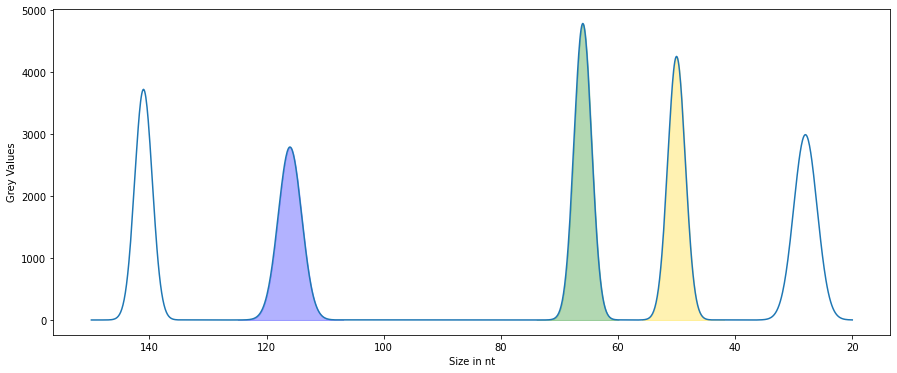

In [27]:
plt.figure(figsize=(15,6))
plot = plt.plot(xy_data["Size in nt"], xy_data["Intensity Values"])
plt.fill_between(x_data[left_ips[1]:right_ips[1]], y_data[left_ips[1]:right_ips[1]], color='gold', alpha=0.3)
plt.fill_between(x_data[left_ips[2]:right_ips[2]], y_data[left_ips[2]:right_ips[2]], color='green', alpha=0.3)
plt.fill_between(x_data[left_ips[3]:right_ips[3]], y_data[left_ips[3]:right_ips[3]], color='blue', alpha=0.3)
ax = plt.gca().invert_xaxis()
plt.xlabel("Size in nt")
plt.ylabel("Grey Values")
plt.show()

5. Normalizing the each area with the total area.

In [28]:
total_area = intact_dna_area+cut_dna_i_area+cut_dna_ii_area
total_area = total_area/2
total_area

23999.36396504814

In [29]:
intact_norm_list = []
intact_norm = intact_dna_area/total_area
intact_norm_list.append(intact_norm)
intact_norm_list

[0.6666562129645371]

In [30]:
cut_dna_i_norm_list = []
cut_dna_i_norm = cut_dna_i_area/total_area
cut_dna_i_norm_list.append(cut_dna_i_norm)
cut_dna_i_norm_list

[0.7499992671914468]

In [31]:
cut_dna_ii_norm_list = []
cut_dna_ii_norm = cut_dna_ii_area/total_area
cut_dna_ii_norm_list.append(cut_dna_ii_norm)
cut_dna_ii_norm_list

[0.5833445198440161]

In [32]:
#auc_percent_substrate_list[-1] = 0
#time_points = [0, 10, 30, 60, 180, 360, 1800, 6000]
time_points = [360]
time = pd.DataFrame(time_points, columns=["Time_Points, s"])
auc_int_dna = pd.DataFrame(intact_norm_list, columns=["Intact DNA"])
auc_cut_dna_i = pd.DataFrame(cut_dna_i_norm_list, columns=["Cut DNA I"])
auc_cut_dna_ii = pd.DataFrame(cut_dna_ii_norm_list, columns=["Cut DNA II"])
df = pd.concat([time, auc_int_dna, auc_cut_dna_i, auc_cut_dna_ii], axis=1)

,"Time_Points, s",Intact DNA,Cut DNA I,Cut DNA II
0,360,0.666656,0.749999,0.583345


In [ ]:
# Initialize the normalized data list for the substrate
substrate_data_norm = []

# Initialize a dictionary to store normalized data for products
product_data_norm = {}

# Extract column names for products dynamically (excluding the 'Substrate' column)
product_columns = [col for col in data.columns if col.startswith("Product_")]

# Initialize lists in the dictionary for each product column
for product in product_columns:
    product_data_norm[product] = []

for i in range(len(data)):  # Dynamically get the number of rows from the data
    # Take column of the data frame
    d1 = data["Substrate"]
    
    # Sum the total amount in each row for products
    d_total = d1[i] + sum(data[product][i] for product in product_columns)
    
    # Normalize the substrate
    sub_norm = d1[i] / d_total
    sub_norm = round(sub_norm, 3)
    substrate_data_norm.append(sub_norm)
    
    # Normalize each product dynamically
    for product in product_columns:
        prod_norm = data[product][i] / d_total
        prod_norm = round(prod_norm, 3)
        product_data_norm[product].append(prod_norm)

# Assign normalized data back to the dataframe
data["Substrate_norm"] = substrate_data_norm
for product in product_columns:
    data[f"{product}_norm"] = product_data_norm[product]

data

In [33]:
data.to_csv('analysis_results.csv', encoding='utf-8', index = False, header = False)